In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 400
path = './losses/tps/tps_loss_'
aff = './losses/aff/affine_loss_'

In [2]:
#Loading TPS losses, reshaping DFs
vgg = pd.read_csv(path+'vgg_basefr.csv').drop(columns='Unnamed: 0')
vgg['model']='vgg'
vgg = vgg.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')

res = pd.read_csv(path+'resnet101_basefr.csv').drop(columns='Unnamed: 0')
res['model']='resnet101'
res = res.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')

wb_base = pd.read_csv(path+'wormbrain_basefr.csv').drop(columns='Unnamed: 0')
wb_base['model']='wb_base'
wb_base = wb_base.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')

wb_deep = pd.read_csv(path+'wormbrain_deepfr.csv').drop(columns='Unnamed: 0')
wb_deep['model']='wb_deep'
wb_deep = wb_deep.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')


wb_simpler  = pd.read_csv(path+'wormbrain_simplerfr.csv').drop(columns='Unnamed: 0')
wb_simpler['model'] = 'wb_simpler'
wb_simpler = wb_simpler.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')
tps_tot = pd.concat([vgg, res, wb_base, wb_deep, wb_simpler])

# Loading AFF losses and reshaping
vggAff = pd.read_csv(aff+'vgg_basefr.csv').drop(columns='Unnamed: 0')
vggAff['model']='vgg'
vggAff = vggAff.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')


resAff = pd.read_csv(aff+'resnet101_basefr.csv').drop(columns='Unnamed: 0')
resAff['model']='resnet101'
resAff = resAff.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')

wb_simplerAff  = pd.read_csv(aff+'wb_simplerfr.csv').drop(columns='Unnamed: 0')
wb_simplerAff['model'] = 'wb_simpler'
wb_simplerAff = wb_simplerAff.melt(id_vars = ['model','epoch'],var_name ='type', value_name = 'loss')
aff_tot = pd.concat([vggAff,resAff,wb_simplerAff])
aff_tot.head(1)

,model,epoch,type,loss
0,vgg,1.0,train_loss,0.489062


In [3]:
x = np.linspace(0.01,0.25, 15)

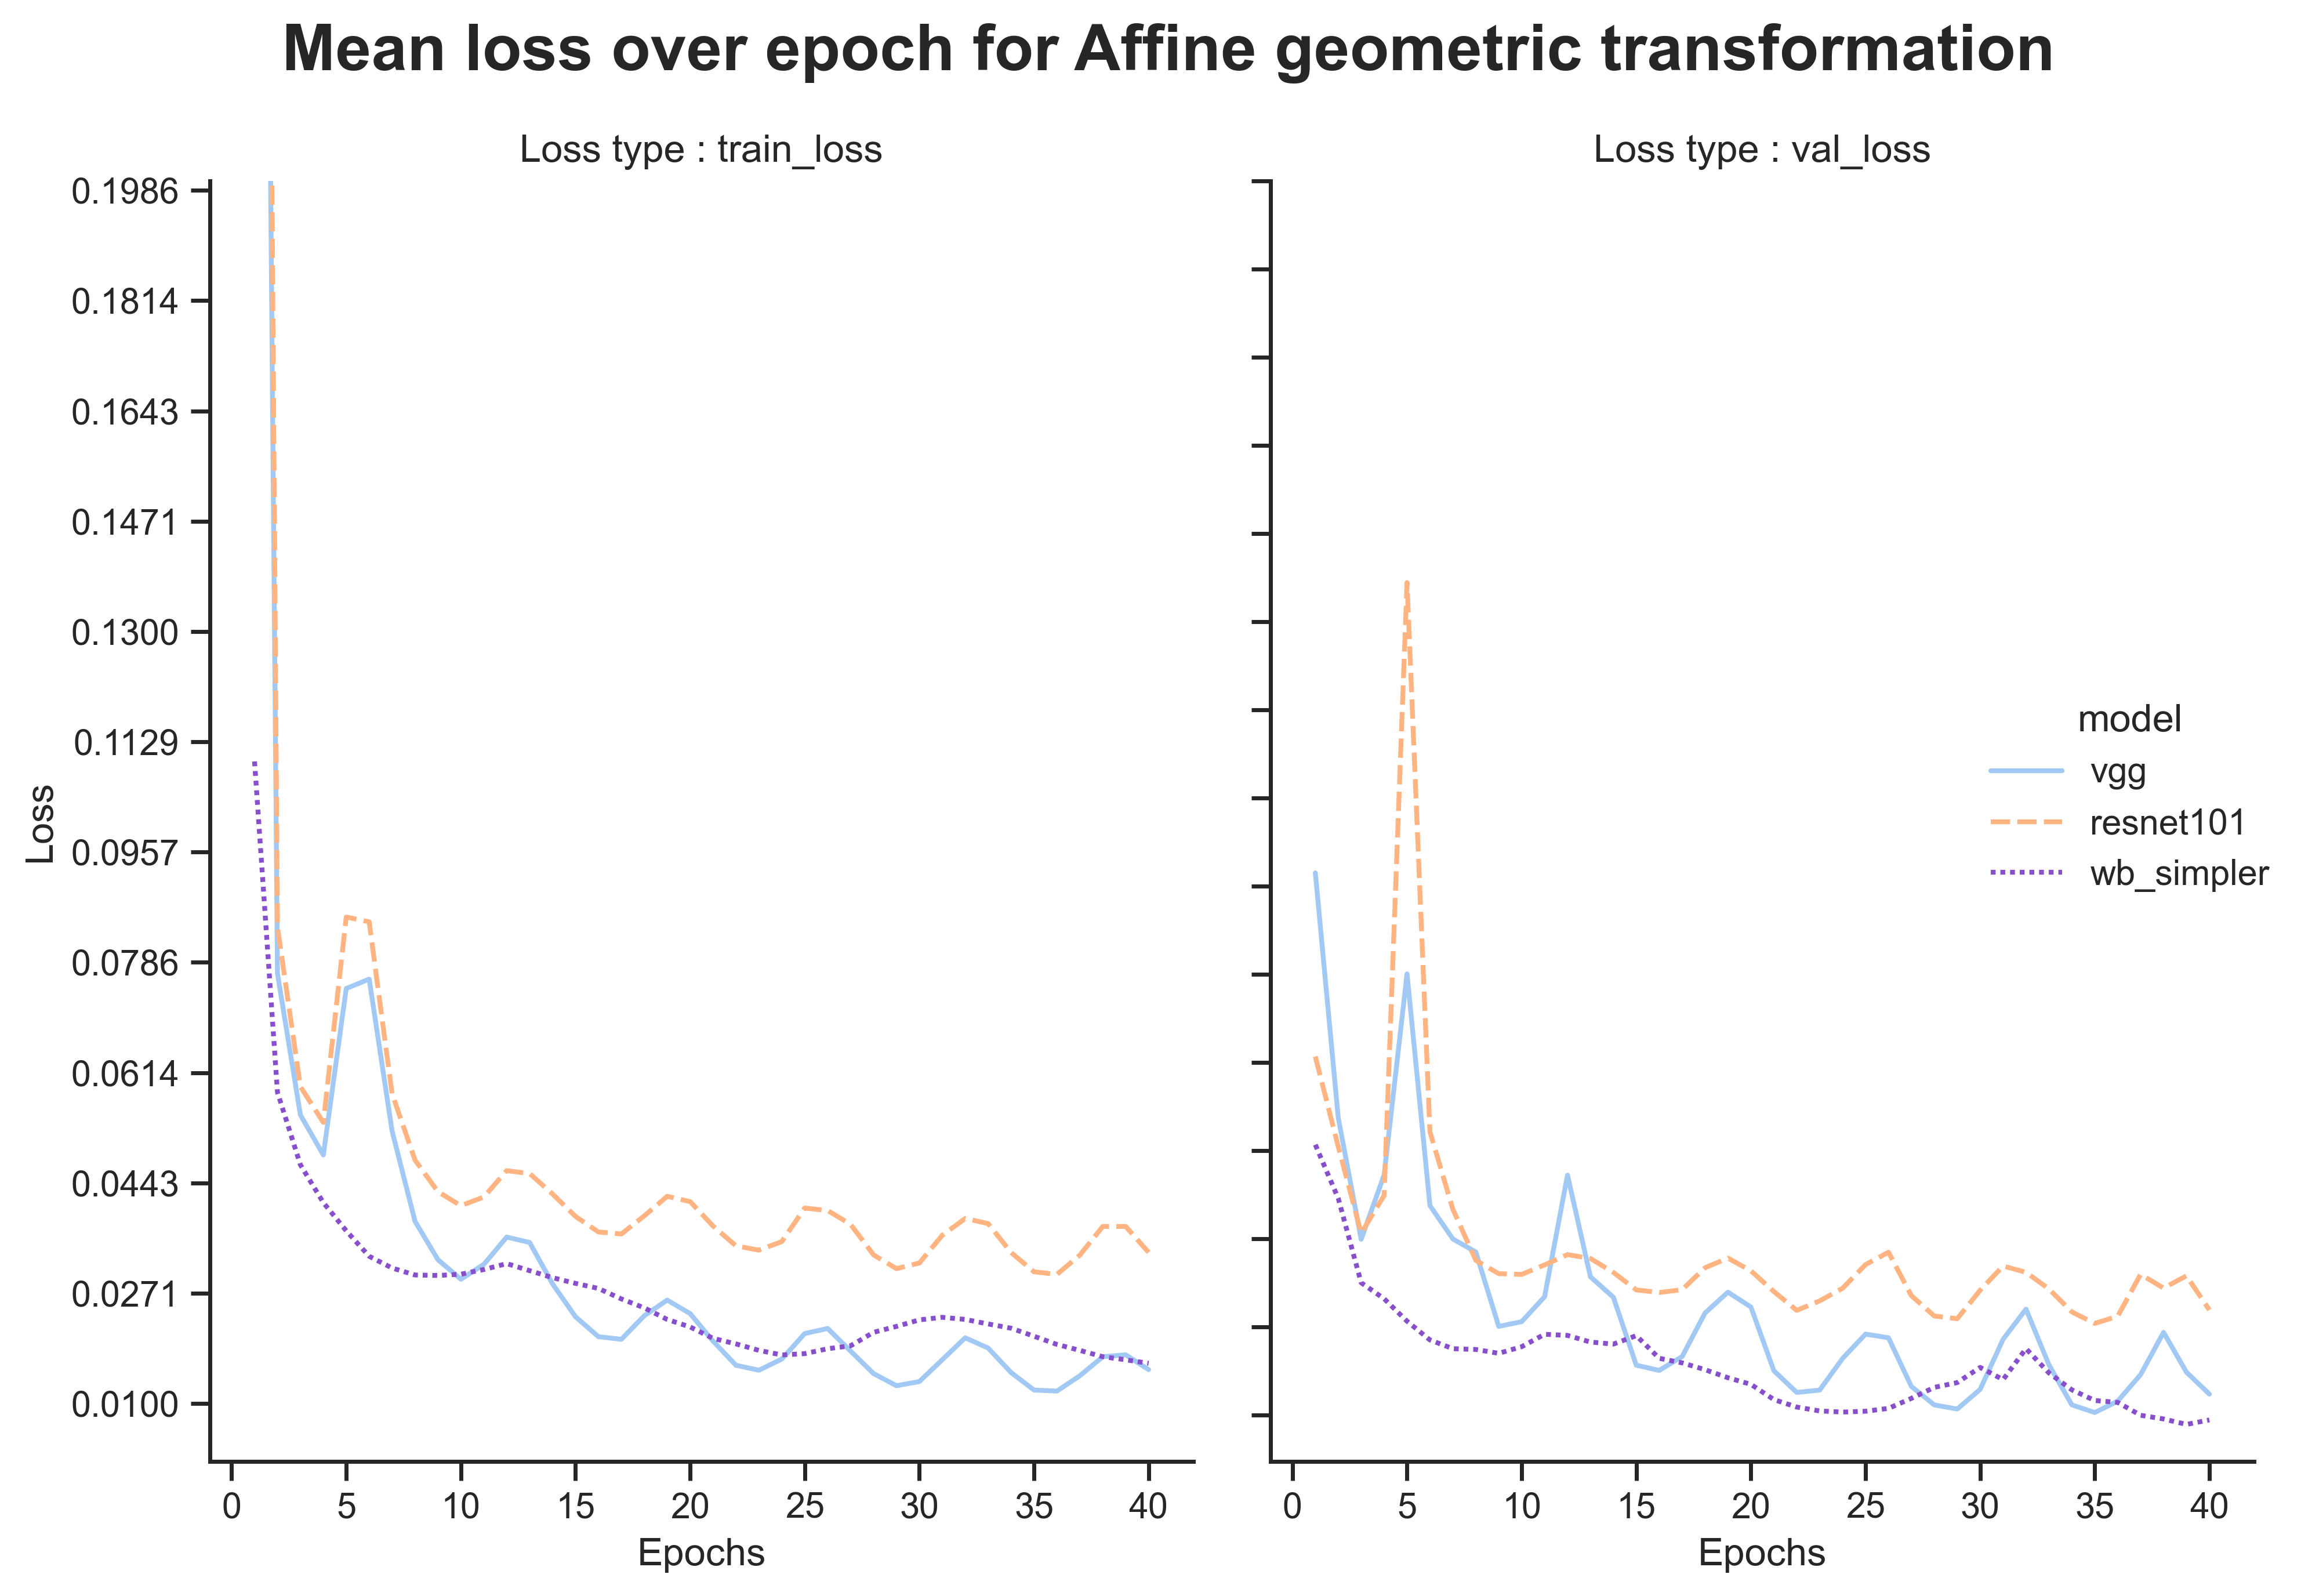

In [4]:
#aff
sns.set_theme(style="ticks")
pal_aff = sns.color_palette('pastel', n_colors=3)#, as_cmap = True)
pal_aff[-1] = (0.53, 0.31, 0.8)
g = sns.relplot(
    data=aff_tot,
     x="epoch", y="loss",
    hue="model", col="type", style = 'model',
    kind="line", palette=pal_aff,
    linewidth = 1.5, dashes = True,
    height=7, aspect=0.6, facet_kws=dict(sharex=False),
)

plt.subplots_adjust(top=0.95)
g.fig.suptitle("Mean loss over epoch for Affine geometric transformation", fontweight='semibold',fontsize=20)
g.set_axis_labels('Epochs', 'Loss')
g.set_titles('Loss type : {col_name}', fontweight = 'light', fontsize = 20)
g.fig.tight_layout(w_pad=1.5)
g.set(ylim = (0.001,0.2), yticks = x)

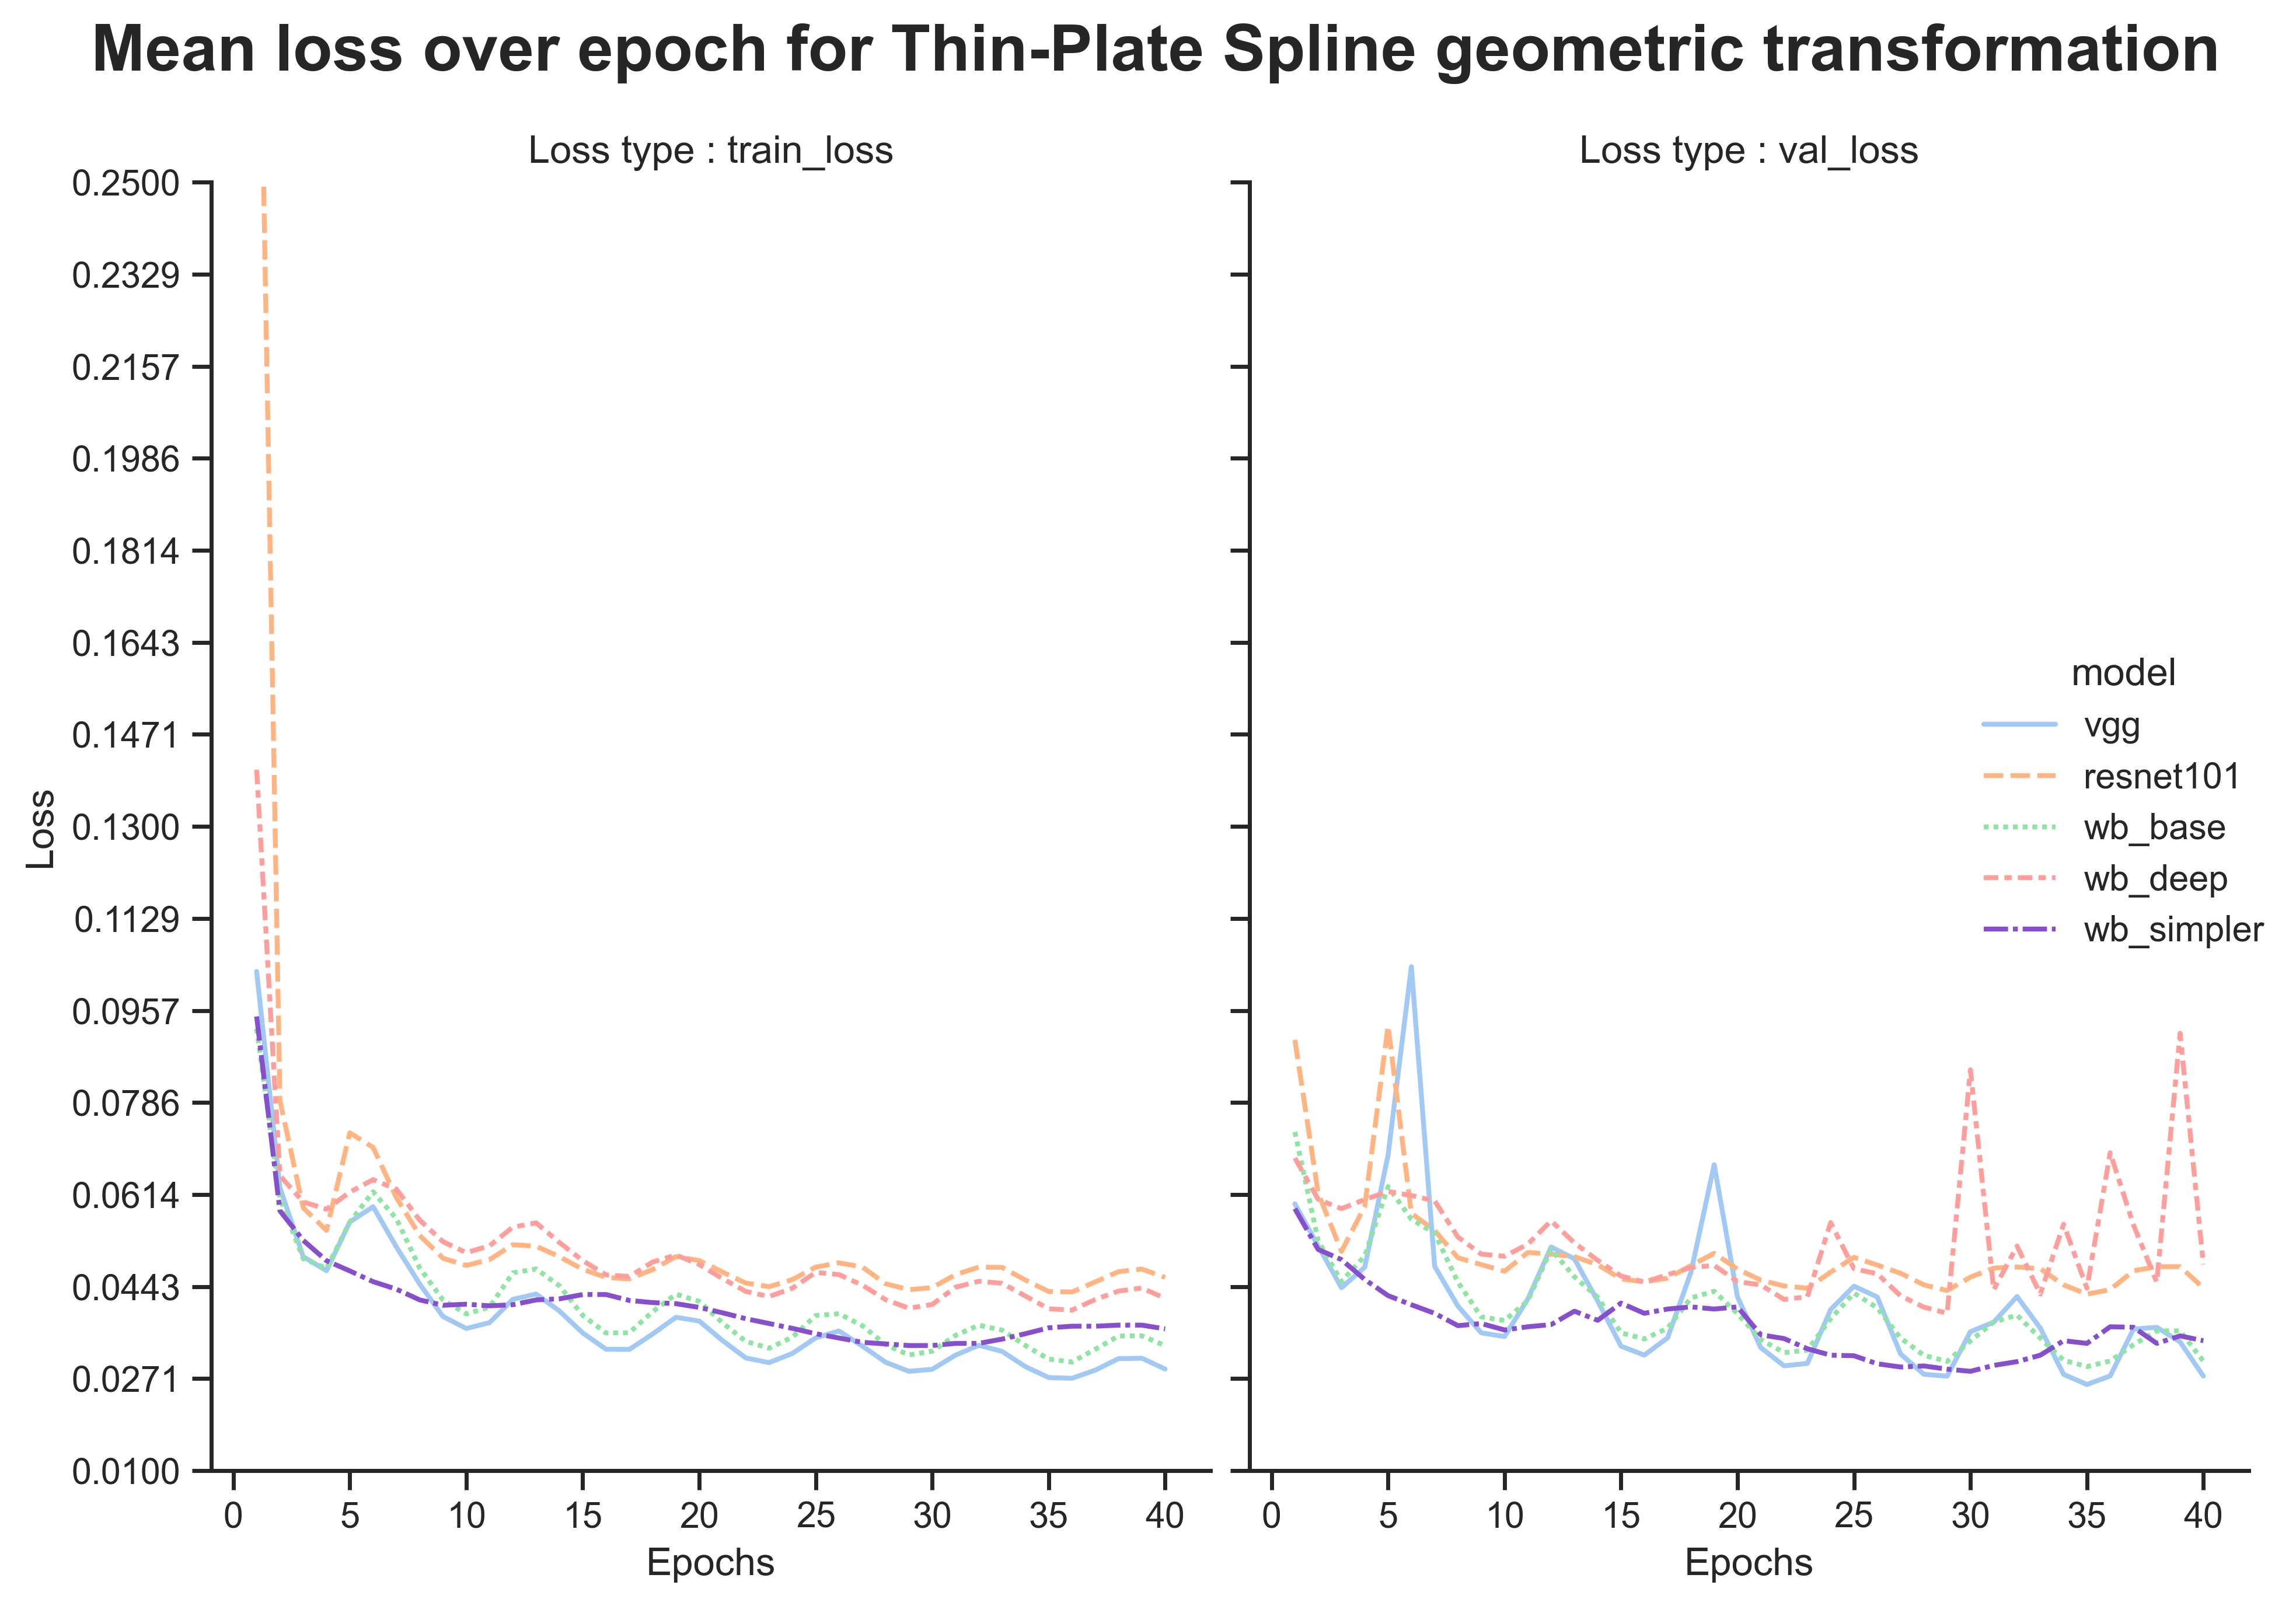

In [5]:
#tps

sns.set_theme(style="ticks")
pal_tps = sns.color_palette('pastel', n_colors=5) #, as_cmap = True)
pal_tps[-1] = (0.53, 0.31, 0.8)

g = sns.relplot(
    data=tps_tot,
    x="epoch", y="loss",
    hue="model", col="type", style = 'model',
    kind="line", palette=pal_tps,
    linewidth = 1.5, dashes = True,#, markers = True, markersize=3,
    height=7, aspect=0.6, facet_kws=dict(sharex=False),
)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Mean loss over epoch for Thin-Plate Spline geometric transformation", fontweight='semibold',fontsize=20)
g.set_axis_labels('Epochs', 'Loss')
g.set_titles('Loss type : {col_name}', fontweight = 'light', fontsize = 20)
g.fig.tight_layout(w_pad=0.5)
g.set(ylim = (0.01,0.25), yticks = x)
